## Unit 2, Lesson 2. Preparing a dataset for modelling
### Robin Fladebo

### Overview

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one or two categorical, three or four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

Data source: Kaggle competition datasets for the competition titled, "Google Analytics Customer Revenue Prediction".
https://www.kaggle.com/c/ga-customer-revenue-prediction/data

### Cleaning the data

In [431]:
import os
import warnings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.options.mode.chained_assignment = None
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import seaborn as sns
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)

In [432]:
revtmp = pd.read_csv('../../Datafiles/unit_2/train_v2.csv', encoding = 'latin-1', nrows = 10000)     

In [434]:
#Code to flatten JSON columns authored by Julian Pellar, available here: 
#https://www.kaggle.com/julian3833/1-quick-start-read-csv-and-flatten-json-fields
def load_df(csv_path='../../Datafiles/unit_2/train_v2.csv', nrows=10000):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [435]:
tmp_df = load_df()

Loaded train_v2.csv. Shape: (10000, 59)


In [436]:
tmp_df.columns

Index(['channelGrouping', 'customDimensions', 'date', 'fullVisitorId', 'hits',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device.browser', 'device.browserSize', 'device.browserVersion',
       'device.deviceCategory', 'device.flashVersion', 'device.isMobile',
       'device.language', 'device.mobileDeviceBranding',
       'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
       'device.mobileDeviceModel', 'device.mobileInputSelector',
       'device.operatingSystem', 'device.operatingSystemVersion',
       'device.screenColors', 'device.screenResolution', 'geoNetwork.city',
       'geoNetwork.cityId', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.metro',
       'geoNetwork.networkDomain', 'geoNetwork.networkLocation',
       'geoNetwork.region', 'geoNetwork.subContinent', 'totals.bounces',
       'totals.hits', 'totals.newVisits', 'totals.pageviews',
       'totals.ses

In [437]:
tmp_df.dtypes

channelGrouping                                      object
customDimensions                                     object
date                                                  int64
fullVisitorId                                        object
hits                                                 object
socialEngagementType                                 object
visitId                                               int64
visitNumber                                           int64
visitStartTime                                        int64
device.browser                                       object
device.browserSize                                   object
device.browserVersion                                object
device.deviceCategory                                object
device.flashVersion                                  object
device.isMobile                                        bool
device.language                                      object
device.mobileDeviceBranding             

In [438]:
tmp_df.tail(10)


,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
9990,Social,"[{'index': '4', 'value': 'EMEA'}]",20170126,7313690301922051995,"[{'hitNumber': '1', 'time': '0', 'hour': '5', ...",Not Socially Engaged,1485435879,1,1485435879,Firefox,...,NaN,NaN,NaN,NaN,(not set),NaN,NaN,referral,/yt/about/pl/,youtube.com
9991,Direct,"[{'index': '4', 'value': 'Central America'}]",20170126,2894731433944151657,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,1485455076,1,1485455076,Chrome,...,NaN,NaN,NaN,NaN,(not set),True,NaN,(none),NaN,(direct)
9992,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20170126,4859867606940949145,"[{'hitNumber': '1', 'time': '0', 'hour': '0', ...",Not Socially Engaged,1485420016,1,1485420016,Firefox,...,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(none),NaN,(direct)
9993,Organic Search,[],20170126,8004719101670184375,"[{'hitNumber': '1', 'time': '0', 'hour': '0', ...",Not Socially Engaged,1485420593,1,1485420593,Chrome,...,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(none),NaN,(direct)
9994,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20170126,4218529876722555109,"[{'hitNumber': '1', 'time': '0', 'hour': '2', ...",Not Socially Engaged,1485424820,1,1485424820,Chrome,...,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(none),NaN,(direct)
9995,Organic Search,[],20170126,1459023938871337285,"[{'hitNumber': '1', 'time': '0', 'hour': '15',...",Not Socially Engaged,1485472474,1,1485472474,Chrome,...,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(none),NaN,(direct)
9996,Social,"[{'index': '4', 'value': 'EMEA'}]",20170126,1909873032670954532,"[{'hitNumber': '1', 'time': '0', 'hour': '20',...",Not Socially Engaged,1485492975,1,1485492975,YaBrowser,...,NaN,NaN,NaN,NaN,(not set),NaN,NaN,referral,/yt/about/ru/,youtube.com
9997,Direct,"[{'index': '4', 'value': 'EMEA'}]",20170126,2136283056523207765,"[{'hitNumber': '1', 'time': '0', 'hour': '6', ...",Not Socially Engaged,1485440095,1,1485440095,Chrome,...,NaN,NaN,NaN,NaN,(not set),True,NaN,(none),NaN,(direct)
9998,Direct,"[{'index': '4', 'value': 'APAC'}]",20170126,6072013696445024429,"[{'hitNumber': '1', 'time': '0', 'hour': '22',...",Not Socially Engaged,1485498638,1,1485498638,Chrome,...,NaN,NaN,NaN,NaN,(not set),True,NaN,(none),NaN,(direct)
9999,Organic Search,"[{'index': '4', 'value': 'APAC'}]",20170126,1766223819719927712,"[{'hitNumber': '1', 'time': '0', 'hour': '11',...",Not Socially Engaged,1485460386,1,1485460386,Chrome,...,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(none),NaN,(direct)


In [439]:
#create new dataframe with selected columns
train_df = tmp_df[['fullVisitorId', 'date', 'visitNumber',\
                   'device.browser','device.isMobile',\
                   'geoNetwork.country', 'geoNetwork.region',\
                   'geoNetwork.subContinent',\
                   'totals.hits', \
                   'totals.totalTransactionRevenue',\
                   'totals.transactionRevenue', 'totals.visits',\
                   'totals.pageviews',\
                   'totals.transactions', 'totals.timeOnSite',\
                   'trafficSource.source',\
                   'trafficSource.adwordsClickInfo.isVideoAd']]

In [440]:
#I've determined that there will be no duplicate column names after I remove prefixes
train_df.rename(columns=lambda x: x.replace('totals.', ''), inplace=True)
train_df.rename(columns=lambda x: x.replace('geoNetwork.', ''), inplace=True)
train_df.rename(columns=lambda x: x.replace('device.', ''), inplace=True)
train_df.rename(columns=lambda x: x.replace('totals.', ''), inplace=True)
train_df.rename(columns=lambda x: x.replace('trafficSource.', ''), inplace=True)
train_df.rename(columns=lambda x: x.replace('adwordsClickInfo.', ''), inplace=True)

In [441]:
#Convert object to appropriate data types
train_df['transactions'] = train_df['transactions'].fillna(0).astype(int)
train_df['hits'] = train_df['hits'].fillna(0)
train_df['hits'] = train_df['hits'].astype(str).astype(int)
train_df['visits'] = train_df['visits'].fillna(0).astype(str).astype(int)
train_df['pageviews'] = train_df['pageviews'].fillna(0).astype(str).astype(int)
train_df['transactionRevenue'] = train_df['transactionRevenue'].fillna(0).astype(str).astype(float)
train_df['timeOnSite'] = train_df['timeOnSite'].fillna(0).astype(str).astype(int)
train_df['date'] = pd.to_datetime(train_df['date'], format='%Y%m%d')

In [442]:
train_df['txRevenueLog'] = np.where(train_df['transactionRevenue']>0, np.log(train_df['transactionRevenue']),0)

/Users/robin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [443]:
train_df.dtypes

fullVisitorId                      object
date                       datetime64[ns]
visitNumber                         int64
browser                            object
isMobile                             bool
country                            object
region                             object
subContinent                       object
hits                                int64
totalTransactionRevenue            object
transactionRevenue                float64
visits                              int64
pageviews                           int64
transactions                        int64
timeOnSite                          int64
source                             object
isVideoAd                          object
txRevenueLog                      float64
dtype: object

The outcome variable is the log of transaction revenue (totals.transactionRevenue) amount.

Categorical variables are "is mobile" and "social engagement type". "Browser", "transaction day of week" and "transaction" month will be added as categorical features.

Continuous variables include transaction revenue, time on site, number of transactions, number of hits, number of visits.


### Exploration

In [444]:
#Which browsers are most commonly used?
browser_list = train_df['transactions'].groupby(train_df['browser']).count().reset_index().sort_values('transactions', ascending=False)

In [445]:
browser_list

,browser,transactions
5,Chrome,7064
18,Safari,1703
8,Firefox,385
9,Internet Explorer,282
7,Edge,122
20,Samsung Internet,97
19,Safari (in-app),79
3,Android Webview,78
15,Opera Mini,73
14,Opera,51


In [446]:
#Code top browsers as categorical variables. 
train_df['chrome'] = np.where(train_df['browser']=='Chrome', 1, 0)
train_df['safari'] = np.where(train_df['browser']=='Safari', 1, 0)
train_df['safari'] = np.where(train_df['browser']=='Safari (in-app)', 1, 0)
train_df['firefox'] = np.where(train_df['browser']=='Firefox', 1, 0)
train_df['explorer'] = np.where(train_df['browser']=='Internet Explorer', 1, 0)
train_df['samsung'] = np.where(train_df['browser']=='Samsung Internet', 1, 0)

In [447]:
train_df.tail(30)

,fullVisitorId,date,visitNumber,browser,isMobile,country,region,subContinent,hits,totalTransactionRevenue,...,transactions,timeOnSite,source,isVideoAd,txRevenueLog,chrome,safari,firefox,explorer,samsung
9970,9878307160662831088,2017-01-26,1,Chrome,False,Brazil,not available in demo dataset,South America,1,NaN,...,0,0,youtube.com,NaN,0.0,1,0,0,0,0
9971,4971656484635674616,2017-01-26,1,Chrome,False,Kazakhstan,not available in demo dataset,Central Asia,1,NaN,...,0,0,(direct),NaN,0.0,1,0,0,0,0
9972,9678749902411889854,2017-01-26,1,Chrome,False,Ukraine,Kyiv city,Eastern Europe,1,NaN,...,0,0,youtube.com,NaN,0.0,1,0,0,0,0
9973,2421883878390560392,2017-01-26,1,Safari,True,Switzerland,not available in demo dataset,Western Europe,1,NaN,...,0,0,(direct),NaN,0.0,0,0,0,0,0
9974,2206537936817258449,2017-01-26,1,Chrome,False,United States,California,Northern America,1,NaN,...,0,0,(direct),NaN,0.0,1,0,0,0,0
9975,8276860985027847552,2017-01-26,1,Chrome,False,China,not available in demo dataset,Eastern Asia,1,NaN,...,0,0,baidu,NaN,0.0,1,0,0,0,0
9976,6717749606113635470,2017-01-26,1,Chrome,False,Poland,not available in demo dataset,Eastern Europe,1,NaN,...,0,0,(direct),NaN,0.0,1,0,0,0,0
9977,4756014584325115161,2017-01-26,1,Chrome,False,United Kingdom,not available in demo dataset,Northern Europe,1,NaN,...,0,0,youtube.com,NaN,0.0,1,0,0,0,0
9978,0517479849409568128,2017-01-26,1,Chrome,True,Netherlands,not available in demo dataset,Western Europe,1,NaN,...,0,0,youtube.com,NaN,0.0,1,0,0,0,0
9979,8632622239866575237,2017-01-26,1,Opera,True,India,Karnataka,Southern Asia,1,NaN,...,0,0,(direct),NaN,0.0,0,0,0,0,0


In [448]:
train_abbr = pd.DataFrame(train_df.loc[train_df['txRevenueLog']>0], columns=('chrome', 'safari',\
                'firefox', 'explorer', 'transactionRevenue'))          

                      chrome    safari   firefox  explorer  transactionRevenue
chrome              1.000000 -0.271992 -0.271992 -0.271992            0.096936
safari             -0.271992  1.000000 -0.010204 -0.010204           -0.055546
firefox            -0.271992 -0.010204  1.000000 -0.010204           -0.051085
explorer           -0.271992 -0.010204 -0.010204  1.000000           -0.041623
transactionRevenue  0.096936 -0.055546 -0.051085 -0.041623            1.000000


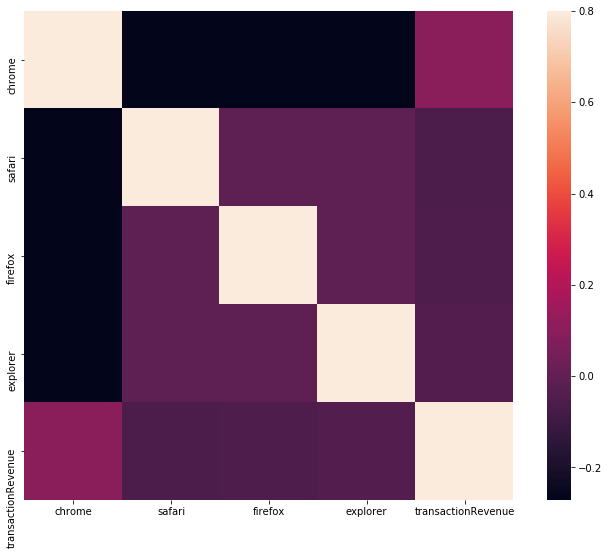

In [449]:
# Make the correlation matrix.
corrmat = train_abbr.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [450]:
subc_counts = train_df['transactions'].groupby(train_df['subContinent']).count().reset_index().sort_values('transactions', ascending=False)

In [451]:
print(subc_counts)

        subContinent  transactions
9   Northern America          4681
18    Western Europe           726
10   Northern Europe           703
14     Southern Asia           593
6       Eastern Asia           572
12    Southeast Asia           539
11     South America           498
7     Eastern Europe           409
15   Southern Europe           384
17      Western Asia           330
3    Central America           207
1        Australasia           145
8    Northern Africa            73
5     Eastern Africa            40
16    Western Africa            32
2          Caribbean            26
13   Southern Africa            17
0          (not set)            14
4       Central Asia            11


### Create ten new features

In [452]:
#Create day of week, month of year, browser, is video ad

In [453]:
train_df['day_of_week'] = train_df['date'].dt.day_name()

In [454]:
train_df['month'] = train_df['date'].dt.month

In [455]:
train_df.tail(20)

,fullVisitorId,date,visitNumber,browser,isMobile,country,region,subContinent,hits,totalTransactionRevenue,...,source,isVideoAd,txRevenueLog,chrome,safari,firefox,explorer,samsung,day_of_week,month
9980,8595290839555237405,2017-01-26,1,Android Webview,True,Turkey,Istanbul,Western Asia,1,NaN,...,(direct),NaN,0.0,0,0,0,0,0,Thursday,1
9981,2703892086988800605,2017-01-26,1,Chrome,False,Italy,not available in demo dataset,Southern Europe,1,NaN,...,(direct),NaN,0.0,1,0,0,0,0,Thursday,1
9982,6749838451654818869,2017-01-26,1,Chrome,False,United Kingdom,not available in demo dataset,Northern Europe,1,NaN,...,(direct),NaN,0.0,1,0,0,0,0,Thursday,1
9983,3872627125403688326,2017-01-26,1,Chrome,False,Germany,not available in demo dataset,Western Europe,1,NaN,...,youtube.com,NaN,0.0,1,0,0,0,0,Thursday,1
9984,7986235831509283089,2017-01-26,1,Chrome,False,India,Maharashtra,Southern Asia,1,NaN,...,quora.com,NaN,0.0,1,0,0,0,0,Thursday,1
9985,1952015256069054894,2017-01-26,1,Chrome,False,Turkey,not available in demo dataset,Western Asia,1,NaN,...,youtube.com,NaN,0.0,1,0,0,0,0,Thursday,1
9986,8934806700850443950,2017-01-26,1,Internet Explorer,False,Japan,not available in demo dataset,Eastern Asia,1,NaN,...,youtube.com,NaN,0.0,0,0,0,1,0,Thursday,1
9987,0133469103785134263,2017-01-26,1,Edge,False,United States,not available in demo dataset,Northern America,1,NaN,...,(direct),False,0.0,0,0,0,0,0,Thursday,1
9988,9750471352786955725,2017-01-26,1,Nintendo Browser,False,United States,not available in demo dataset,Northern America,1,NaN,...,youtube.com,NaN,0.0,0,0,0,0,0,Thursday,1
9989,9737863308138302319,2017-01-26,1,Chrome,False,United States,California,Northern America,1,NaN,...,dfa,NaN,0.0,1,0,0,0,0,Thursday,1


### Five best features and justification